___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [45]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [46]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

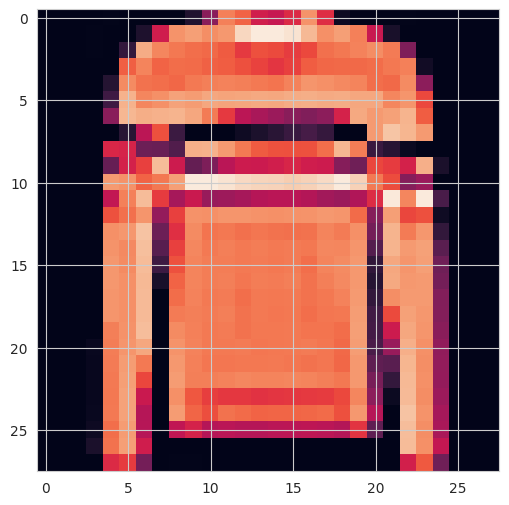

In [47]:
plt.imshow(x_train[5])

In [48]:
y_train[5]

2

In [49]:
x_train.shape

(60000, 28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [50]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

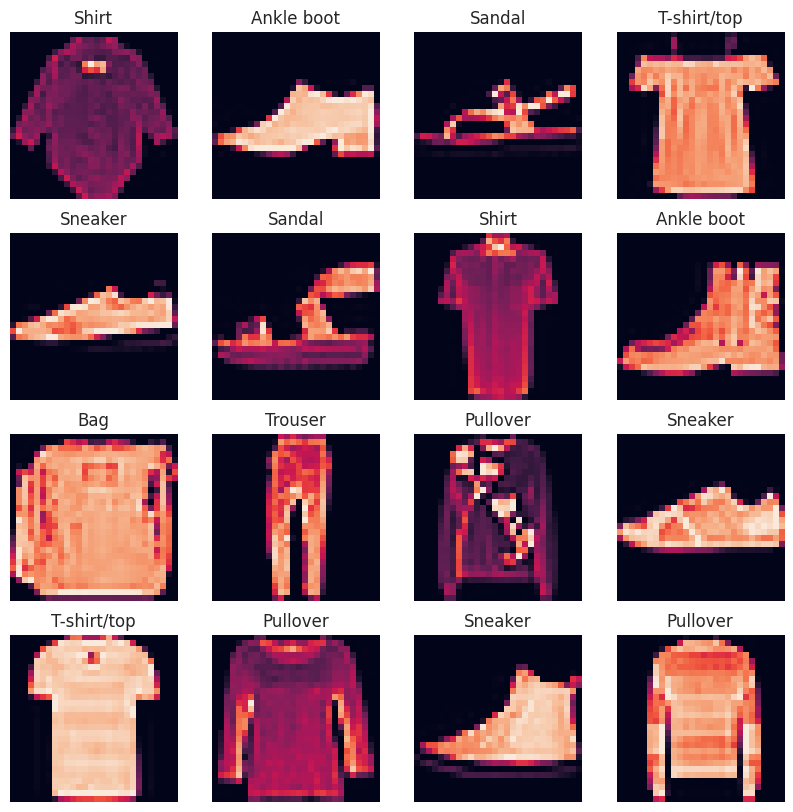

In [55]:
plt.figure(figsize = (10, 10))
for i in range(16):
  Randindex = int(np.random.randint(low=0, high=60000, size = 1))
  plt.subplot(4,4,i+1)
  plt.axis("off")
  plt.title(classes[int(y_train[Randindex])])
  plt.imshow(x_train[Randindex])


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [56]:
x_train[3].min()

0

In [57]:
x_train[3].max()

255

In [58]:
x_train = x_train.astype("float")
x_test = x_test.astype("float")

x_train = x_train / 255
x_test = x_test / 255

In [59]:
x_train[3].min()

0.0

In [60]:
x_train[3].max()

1.0

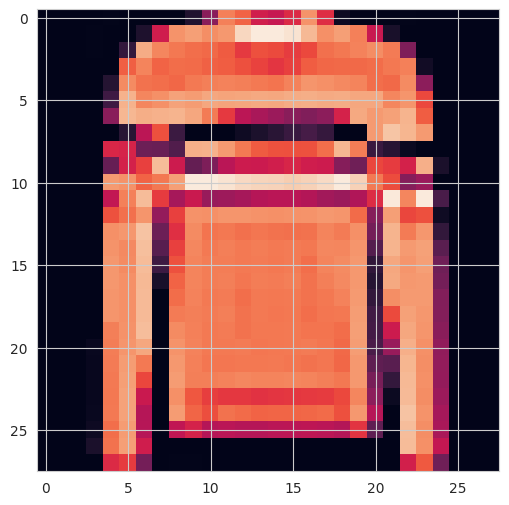

In [62]:
plt.imshow(x_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
x_test.shape

(10000, 28, 28)

In [65]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [66]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [69]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
first_stop = EarlyStopping(monitor="val_accuracy",
                           mode="max",
                           patience=2,
                           restore_best_weights=True)

In [73]:
model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[first_stop])

Epoch 1/10
938/938 [==============================] - 73s 76ms/step - loss: 0.4092 - accuracy: 0.8546 - val_loss: 0.3452 - val_accuracy: 0.8759
Epoch 2/10
938/938 [==============================] - 67s 72ms/step - loss: 0.2706 - accuracy: 0.9016 - val_loss: 0.2811 - val_accuracy: 0.8967
Epoch 3/10
938/938 [==============================] - 67s 71ms/step - loss: 0.2264 - accuracy: 0.9172 - val_loss: 0.2655 - val_accuracy: 0.9041
Epoch 4/10
938/938 [==============================] - 67s 71ms/step - loss: 0.1967 - accuracy: 0.9276 - val_loss: 0.2816 - val_accuracy: 0.8993
Epoch 5/10
938/938 [==============================] - 70s 74ms/step - loss: 0.1706 - accuracy: 0.9368 - val_loss: 0.2818 - val_accuracy: 0.9050
Epoch 6/10
938/938 [==============================] - 67s 72ms/step - loss: 0.1513 - accuracy: 0.9449 - val_loss: 0.2691 - val_accuracy: 0.9113
Epoch 7/10
938/938 [==============================] - 67s 72ms/step - loss: 0.1324 - accuracy: 0.9516 - val_loss: 0.3109 - val_accuracy:

In [74]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.409,0.855,0.345,0.876
1,0.271,0.902,0.281,0.897
2,0.226,0.917,0.265,0.904
3,0.197,0.928,0.282,0.899
4,0.171,0.937,0.282,0.905
5,0.151,0.945,0.269,0.911
6,0.132,0.952,0.311,0.894
7,0.116,0.958,0.254,0.918
8,0.103,0.963,0.330,0.907
9,0.091,0.967,0.294,0.916


**TASK 7: Plot values of metrics you used in your model.**

<Axes: >

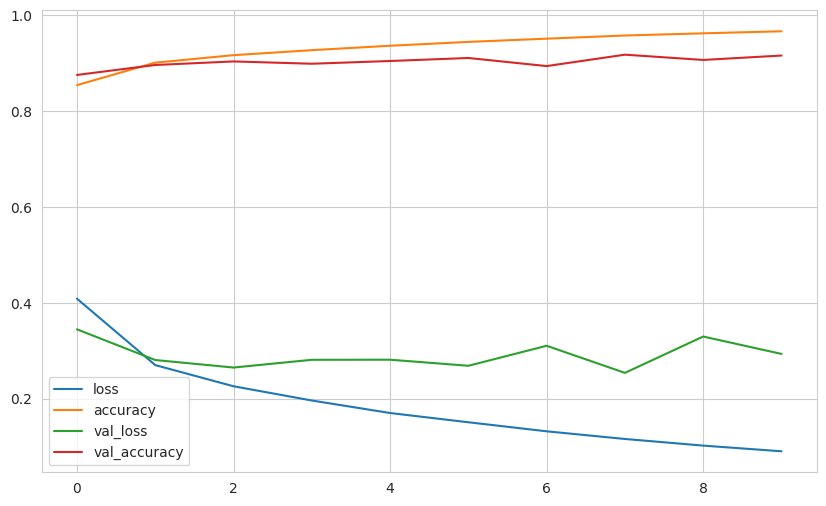

In [75]:
summary.plot()

<Axes: >

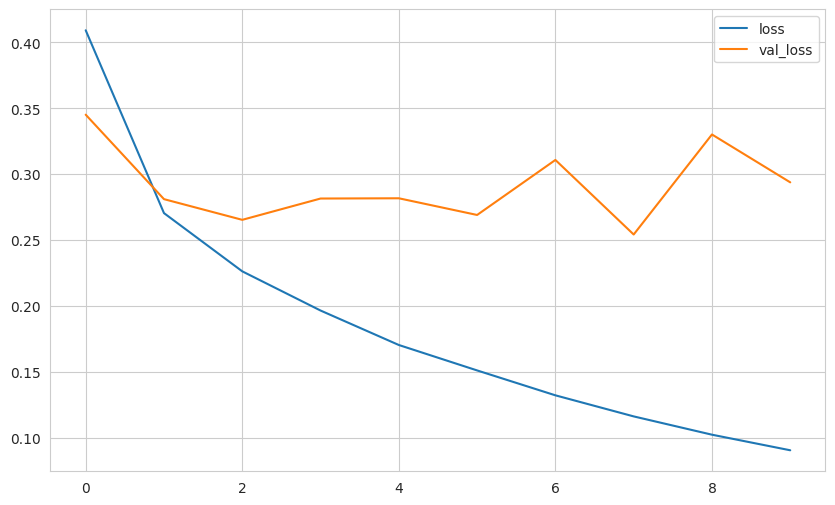

In [76]:
summary[["loss", "val_loss"]].plot()


<Axes: >

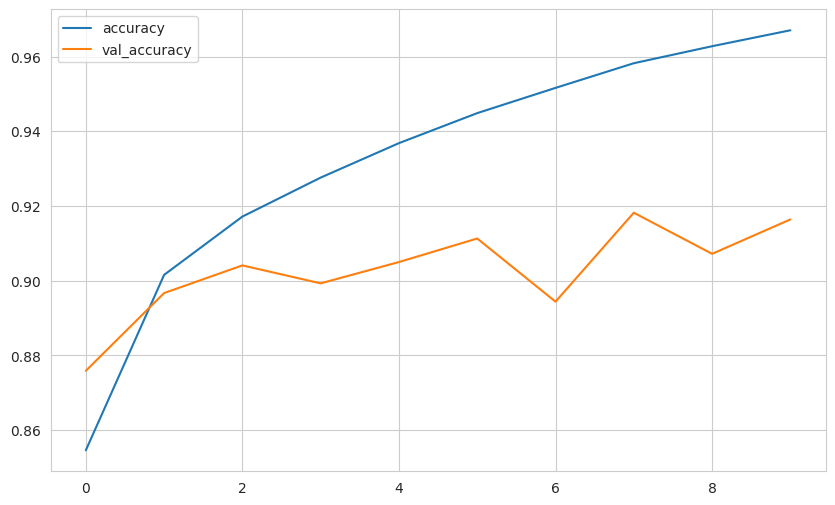

In [77]:
summary[["accuracy", "val_accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix


In [79]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 7s 21ms/step - loss: 0.2543 - accuracy: 0.9182


[0.2543342411518097, 0.9182000160217285]

In [80]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])

Test loss:  0.2543342411518097
Test accuracy 0.9182000160217285


In [82]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 3s 9ms/step


In [83]:
pred_prob.shape

(10000, 10)

In [84]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [85]:
y_test_arg=np.argmax(y_test,axis=1)

In [87]:
Y_pred = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 4s 13ms/step


In [88]:
print(confusion_matrix(y_test_arg, Y_pred))


[[839   1  26  16   1   1 113   0   3   0]
 [  2 982   3  10   1   0   0   0   2   0]
 [ 13   1 892   6  42   0  46   0   0   0]
 [  7   5  14 908  27   0  38   0   1   0]
 [  0   1  52  26 880   0  40   0   1   0]
 [  0   0   0   0   0 980   0  10   0  10]
 [ 58   1  71  20  64   0 778   0   8   0]
 [  0   0   0   0   0   8   0 970   0  22]
 [  3   0   3   6   0   2   3   1 982   0]
 [  1   0   0   0   0   6   0  22   0 971]]


In [89]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.89      0.87      1000
           3       0.92      0.91      0.91      1000
           4       0.87      0.88      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.78      0.77      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<Axes: >

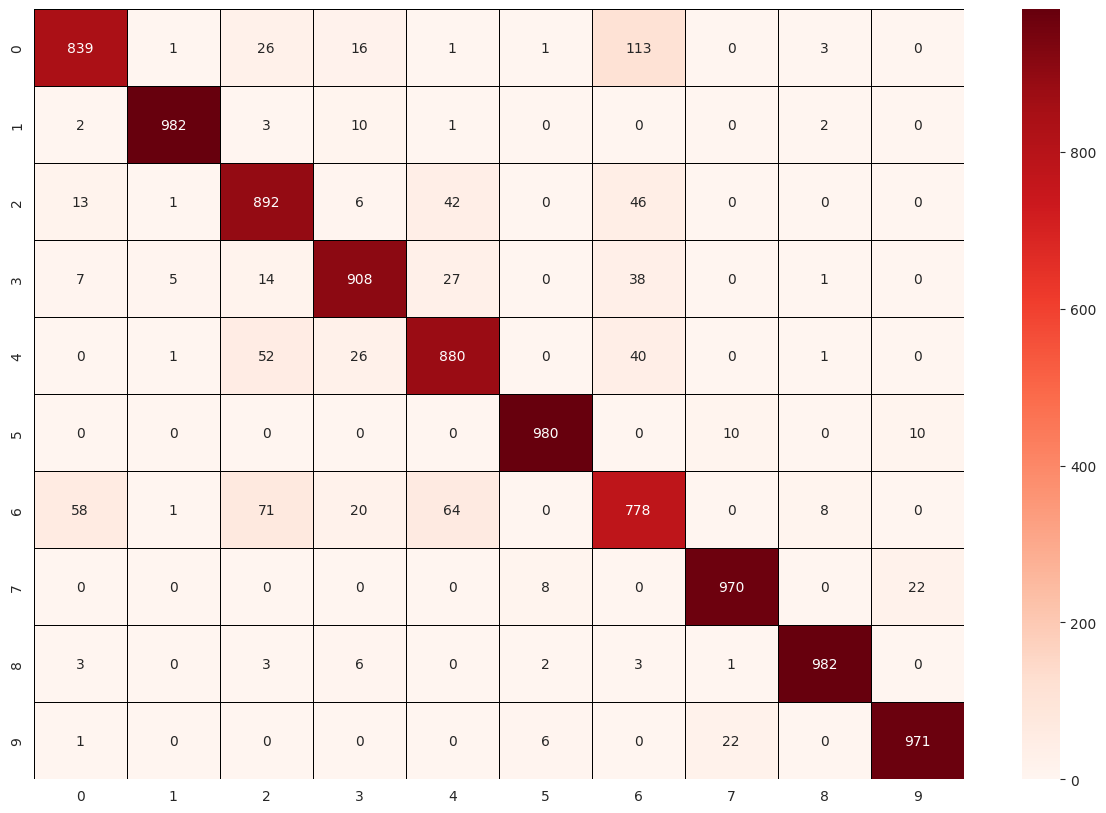

In [95]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test_arg, Y_pred),
            annot=True, cmap="Reds", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size" : 10})

In [96]:
(y_test_arg != Y_pred).sum()

818

## Prediction

In [97]:
model.save("cnn-1.h5")

In [98]:
model = tf.keras.models.load_model("cnn-1.h5")

In [99]:
pred = model.predict(np.expand_dims(x_test[24], axis=0))
np.argmax(pred)

1/1 [==============================] - 0s 103ms/step


1

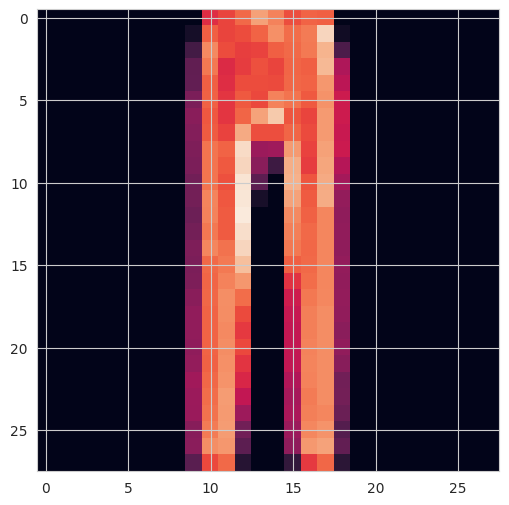

In [102]:
plt.imshow(x_test[24].reshape(28,28))


# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___